In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data 
traindf = pd.read_csv(r".\train.csv")
testdf = pd.read_csv(r".\test.csv")

In [3]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# chuyen doi du lieu
traindf['Survived'] = traindf['Survived'].astype('category')

In [8]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [10]:
traindf['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [15]:
# chuyen doi nhieu du lieu cung luc 
features = [ "Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,feature) :
    for feature in features :
        df[feature]= df[feature].astype("category")

convert_cat(traindf,features)
convert_cat(testdf,features)



In [16]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


In [17]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [18]:
traindf.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [19]:
#distribution of categorical features 
traindf.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### EDA: Exploratory Data Analysis

In [20]:
# number
traindf['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
# phan tram 
traindf['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [26]:
# lam tuong tu 2 bc tren voi cac cot "Age"
traindf['Age'].value_counts().to_frame().sort_values(by='Age')

,count
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


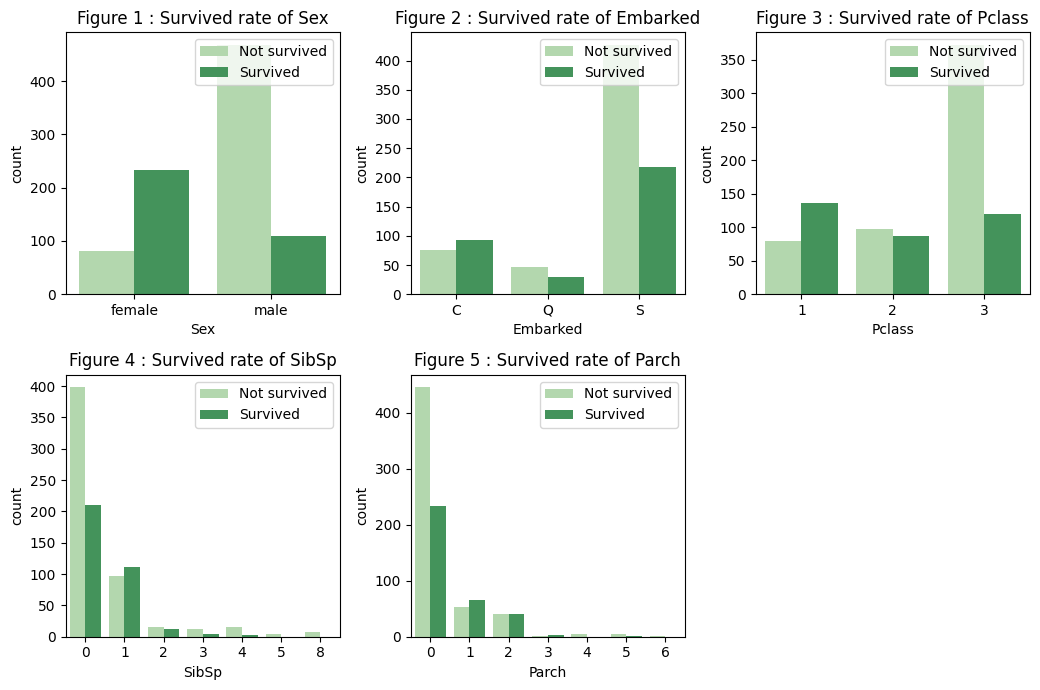

In [53]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3
fig, axis = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))


for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c # loop index throufh charts
        if i< len(cols):
            axis_i = axis[r,c]
            sns.countplot(data=traindf,hue="Survived", x = cols[i], palette="Greens", ax = axis_i)
            axis_i.set_title(f"Figure {i+1} : Survived rate of {cols[i]}")
            axis_i.legend(title='', loc='upper right',labels=['Not survived', 'Survived'])
axis.flat[-1].set_visible(False) #delete the last box
plt.tight_layout()

# Nhận xét biểu đồ : 
* female > male 
* embarked : S > C > Q, ở khoang C thì tỷ lệ survived > not survived
* Pclass : 1 > 2 > 3 , ở hạng 3 thì tỷ lệ chất cực cao, hạng 2 thì 50-50, hạng 1 dễ sống nhất 
* sibSp : bruh ... nma solo traveler chết cao vl 
* parch : solo traveler chết cx cao vcl :)))
=> ncl là sib vs par đồ thị tương đồng nhau á 



# EDA for numerical Features 


Age

<Axes: xlabel='Age', ylabel='Count'>

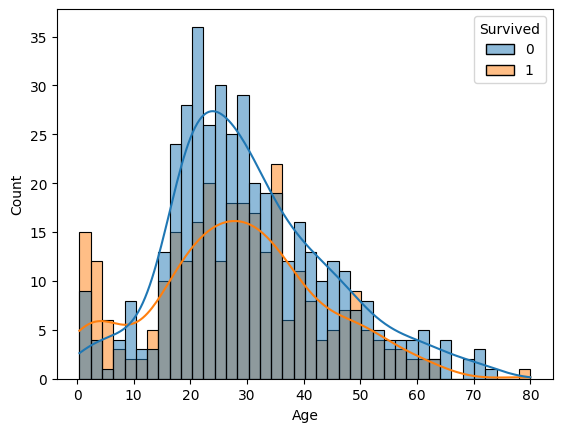

In [61]:
sns.histplot(data=traindf, x='Age', hue="Survived", bins=40, kde=True)

<Axes: xlabel='Fare', ylabel='count'>

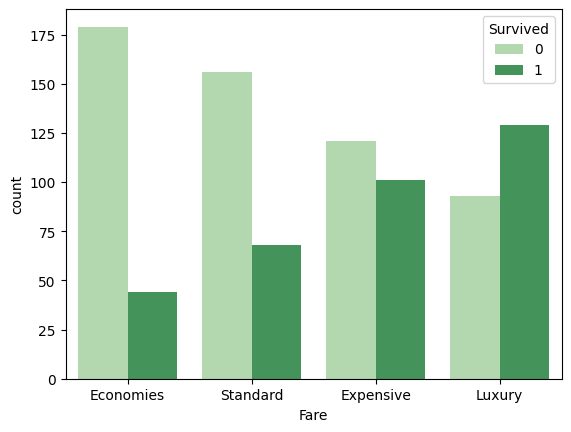

In [66]:
# break down the category
fare_categories = ['Economies','Standard','Expensive','Luxury']
smaller_data = pd.qcut(traindf['Fare'], 4, labels = fare_categories)
sns.countplot(x=smaller_data, hue=traindf['Survived'],palette ="Greens" )

In [71]:
#Nhap 2 cot thanh 1 cot
traindf['Family_Size'] = traindf['Parch'].astype('int') + traindf['SibSp'].astype('int') + 1
testdf['Family_Size'] = testdf['Parch'].astype('int') + testdf['SibSp'].astype('int') + 1


In [97]:
# qcut neu muon so luong ptu trg n bin gan bang nhau, cut neu muon do rong cua moi bin gan bang nhau
traindf['Family_Cat'] = pd.cut(traindf['Family_Size'], bins = 4, labels = ['Solo', 'Small','Medium','Large'])
testdf['Family_Cat'] = pd.cut(testdf['Family_Size'], bins = 4, labels = ['Solo', 'Small','Medium','Large'])

In [96]:
traindf['Family_Cat']

0      Small
1      Small
2       Solo
3      Small
4       Solo
       ...  
886     Solo
887     Solo
888    Small
889     Solo
890     Solo
Name: Family_Cat, Length: 891, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

In [79]:
# data wraggling 
num_features = ['Age','Fare']
cat_features = ['Family_Cat','Embarked','Pclass','Sex']

### FILLING MISSING VALUE (not the best method though)

Age 
 - filling missing value with median of the whole dataset
 
 ddể tìm đc median thì mình cần phải tìm các cái dữ liệu liên quan đến age.

Vd : nam vs nữ, Pclass, ...

In [80]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [85]:
num_transfomer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transfomer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

In [86]:
#fit 
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transfomer, num_features),
    ('cat',cat_transfomer,cat_features)
])

feature_cols = num_features + cat_features
X = traindf[feature_cols]
Y = traindf['Survived']
preprocessor.fit(X)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder())]),
                                 ['Family_Cat', 'Embarked', 'Pclass', 'Sex'])])

In [87]:
X = preprocessor.transform(X)

In [88]:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.2)

# Binary Classification

In [92]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',max_iter= 1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [95]:
log_reg.score(x_val, y_val)

0.7653631284916201